In [14]:
import sys
sys.path.append('/Users/lei/home/studyhall/smart-earth-sensing/lib')

import warnings
warnings.filterwarnings('ignore')

import pickle 
import numpy as np 

import torch
from torch.utils.data import DataLoader 

from matplotlib import pyplot as plt 

from models import CNN
from dataset import * 

In [2]:
with open('../data/pk_files/soil_datasets.pkl', 'rb') as f:
    data_train, data_val = pickle.load(f)

In [3]:
loader_train = DataLoader(data_train, batch_size=32, shuffle=True)
loader_val = DataLoader(data_val, batch_size=32, shuffle=True) 

In [4]:
for xs, ys in loader_train:
    print(xs.size())
    print(ys.size()) 
    break 

torch.Size([32, 1, 51, 64])
torch.Size([32, 3])


In [5]:
print("shape of any feature sample in data_train: {}".format(np.shape(data_train[0][0]))) 
print("shape of any label sample in data_train: {}".format(np.shape(data_train[0][1]))) 
print("shape of any feature sample in data_val: {}".format(np.shape(data_train[0][0]))) 
print("shape of any label sample in data_val: {}".format(np.shape(data_val[0][1]))) 

shape of any feature sample in data_train: torch.Size([1, 51, 64])
shape of any label sample in data_train: torch.Size([3])
shape of any feature sample in data_val: torch.Size([1, 51, 64])
shape of any label sample in data_val: torch.Size([3])


In [6]:
print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built()) 
device = torch.device("mps") 
print("The model will be running on", device, "device")

True
True
The model will be running on mps device


In [7]:
lr = 0.01 
num_epochs = 100 
 
cnn = CNN(device) 
cnn.to(device)

CNN(
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.5, inplace=False)
  (softmax): Softmax(dim=None)
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (linear1): Linear(in_features=75264, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=3, bias=True)
)

In [18]:
cnn.fit(lr=lr, num_epochs=num_epochs, loader_train=loader_train, loader_val=loader_val)

100%|██████████| 50/50 [18:30<00:00, 22.21s/it]


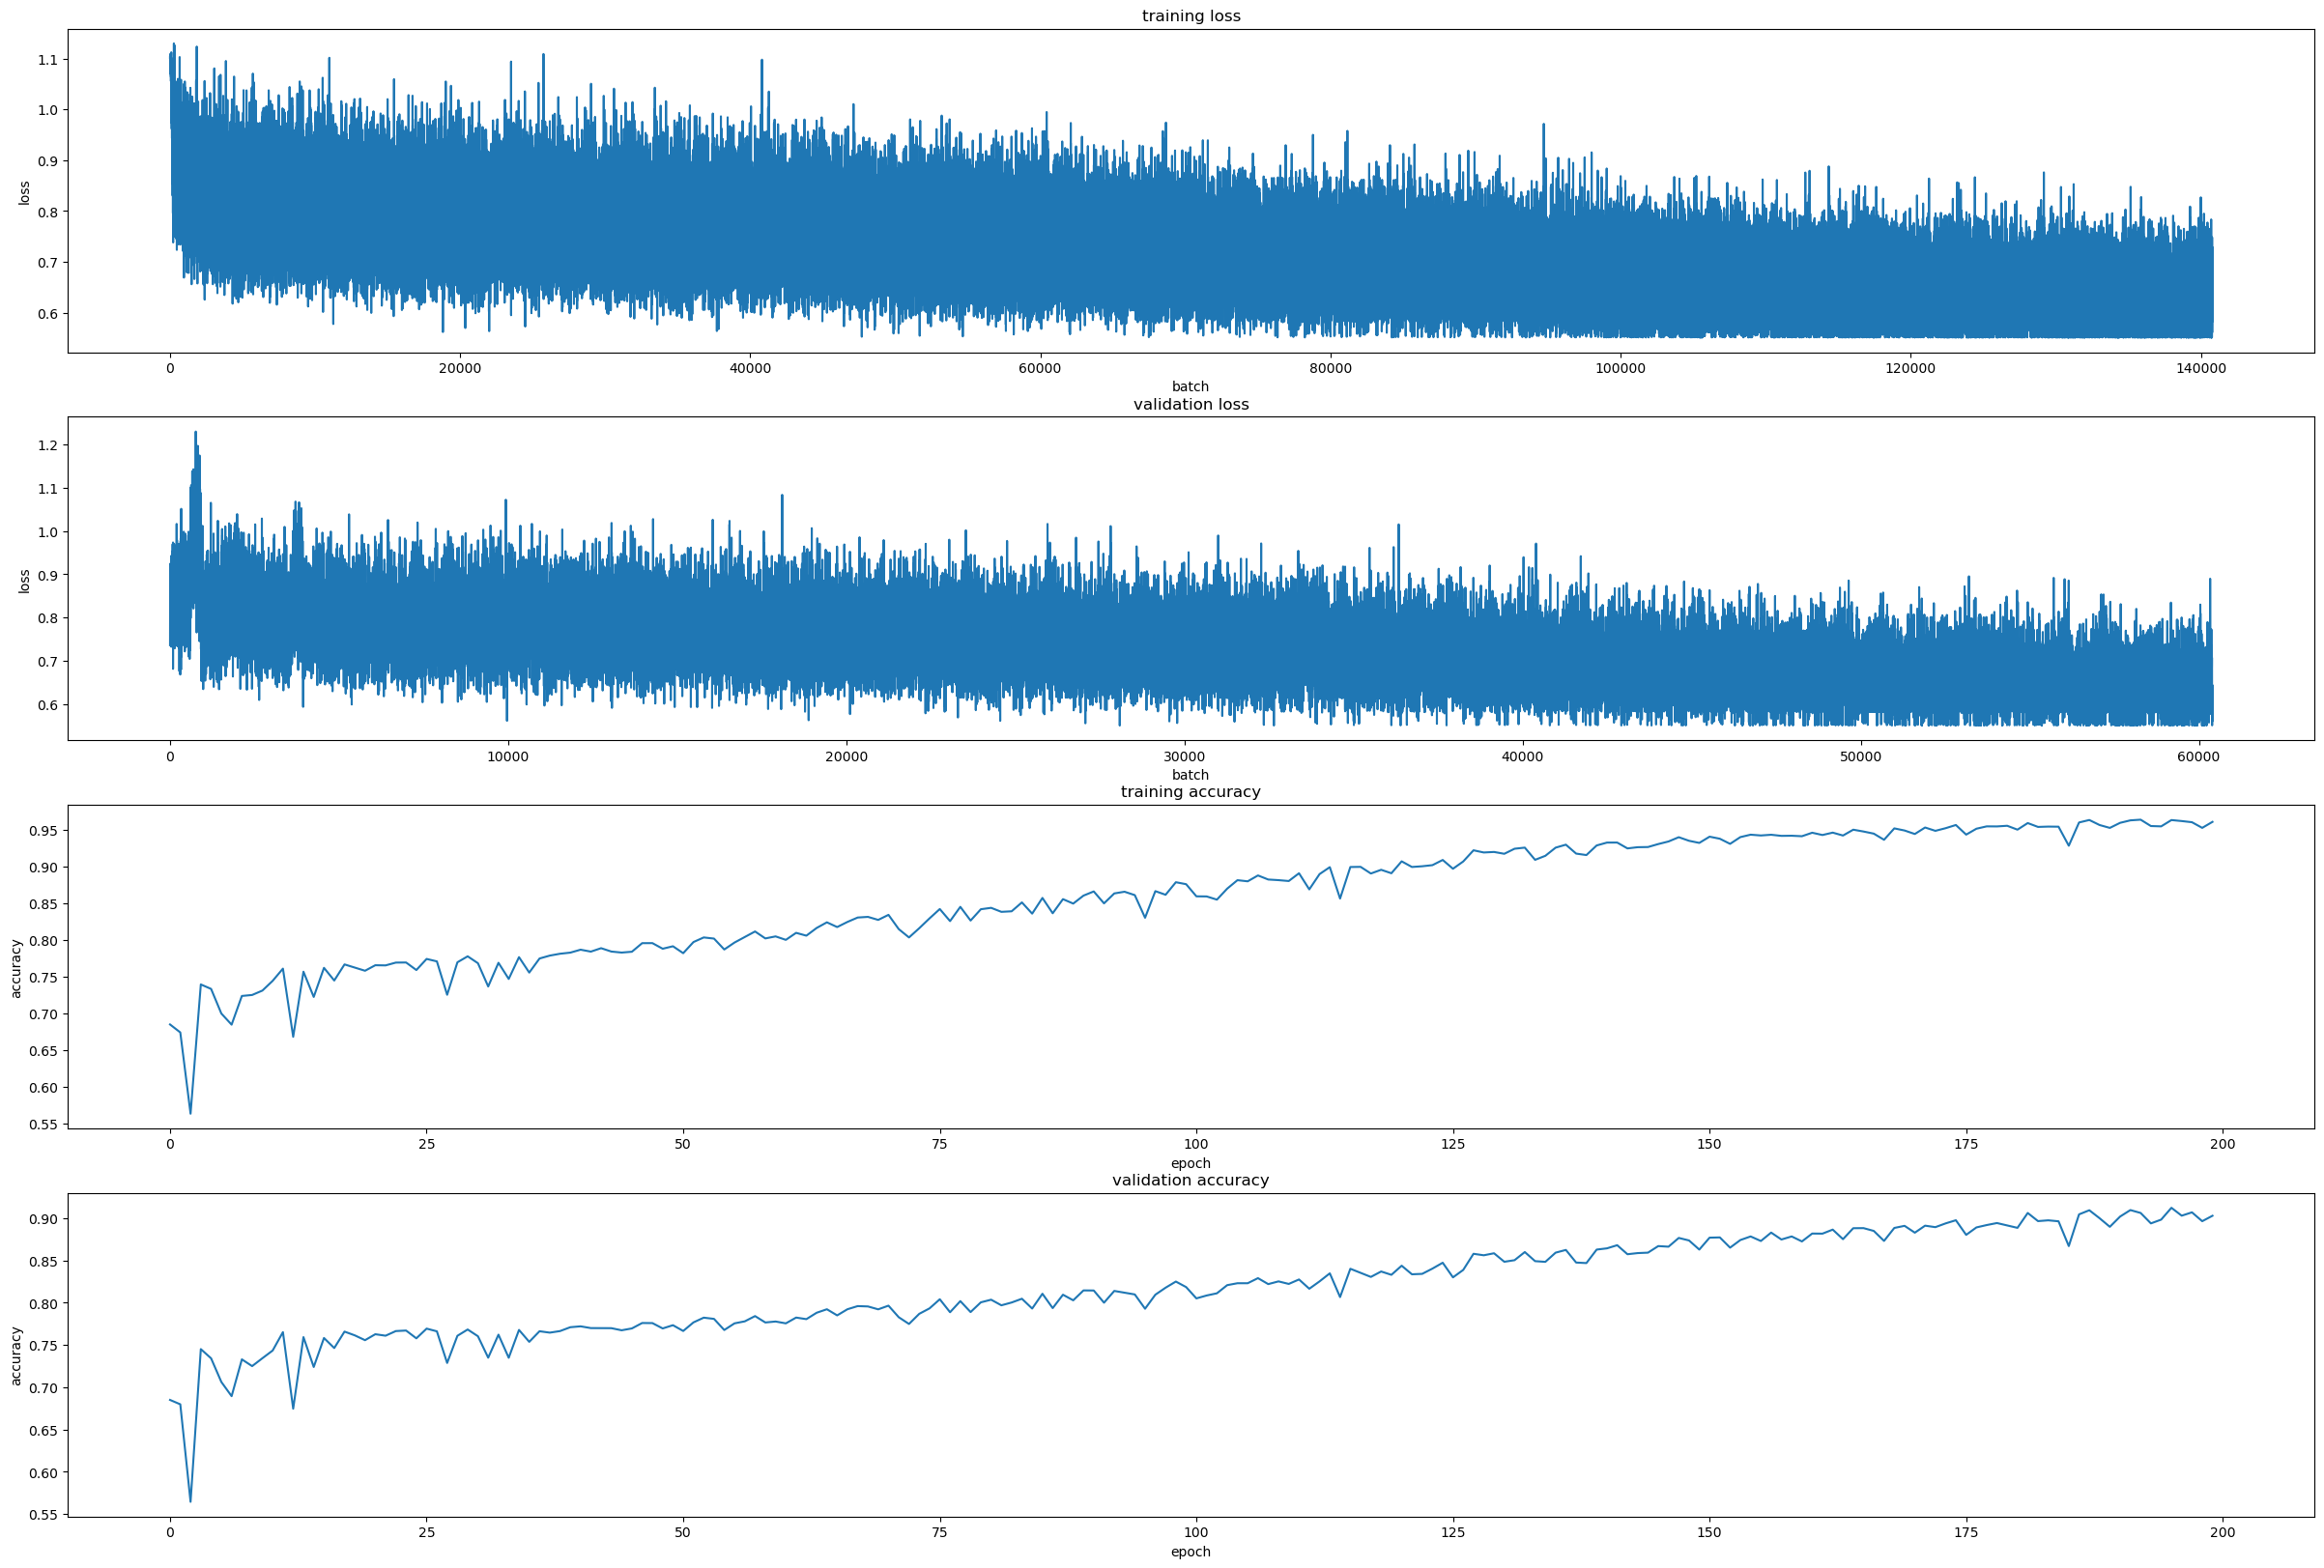

In [19]:
cnn.evaluate()

In [17]:
torch.save(cnn.state_dict(), '../models/soil_cnn_200e_001lr_1000hz.pt')